## MNIST Data Classification using Classical Machine learning Algorithms


- Name: Kaushik Srivasan
- Branch: 4th year, School of Computing & Data Science, Sai University

For Applied Data Analytics Course, CMI

In [2]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Preprocessing
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats

from PIL import Image
import numpy as np
import io

d:\MLDL Projects\vproj\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading Data and Preprocessing

In [3]:
# Owing to difficulty accesing the mnist dataset from Yann Lecun's website ( he possbily discontinued it) , I am using the dataset from huggingface
mnist = load_dataset("ylecun/mnist")
train_df = mnist['train'].to_pandas()
test_df = mnist['test'].to_pandas()

In [4]:
train_df

,image,label
0,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,5
1,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,0
2,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,4
3,"{'bytes': b""\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...",1
4,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,9
...,...,...
59995,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,8
59996,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,3
59997,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,5
59998,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,6


In [ ]:
#Converting bytes to numpy array
def bytes_to_array(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    return np.array(image)
train_df['image'] = train_df['image'].apply(lambda x: bytes_to_array(x['bytes']))
test_df['image'] = test_df['image'].apply(lambda x: bytes_to_array(x['bytes']))


In [ ]:
print(train_df['image'][0].shape)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
#check for nan values
train_df.isna().any().any()


False

### EDA

In [35]:
# Convert images to numpy array
images = np.array(train_df['image'].tolist())
labels = train_df['label']

In [32]:


# Print the shape of the image array
print(f"Image shape: {images[0].shape}")

Image shape: (28, 28)


In [14]:
# Label distribution
label_counts = labels.value_counts().sort_index()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


The image label of index 0 is 5.


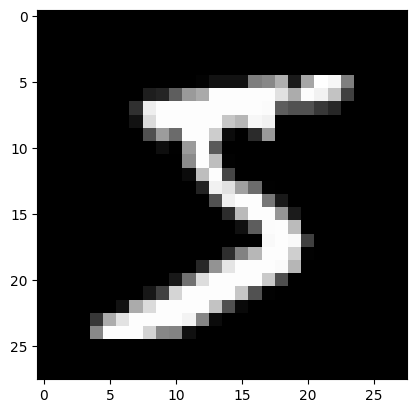

In [22]:


def image_show(i, data, label):
    image_bytes = data[i]['bytes']  # get the image bytes
    image = Image.open(io.BytesIO(image_bytes))  # decode the image bytes
    x = np.array(image)  # convert to numpy array
    x = x.reshape((28, 28))  # reshape it into 28x28 format
    print('The image label of index %d is %d.' % (i, label[i]))
    plt.imshow(x, cmap='gray')  # show the image

# Showing image from training set
image_show(0, images, labels)

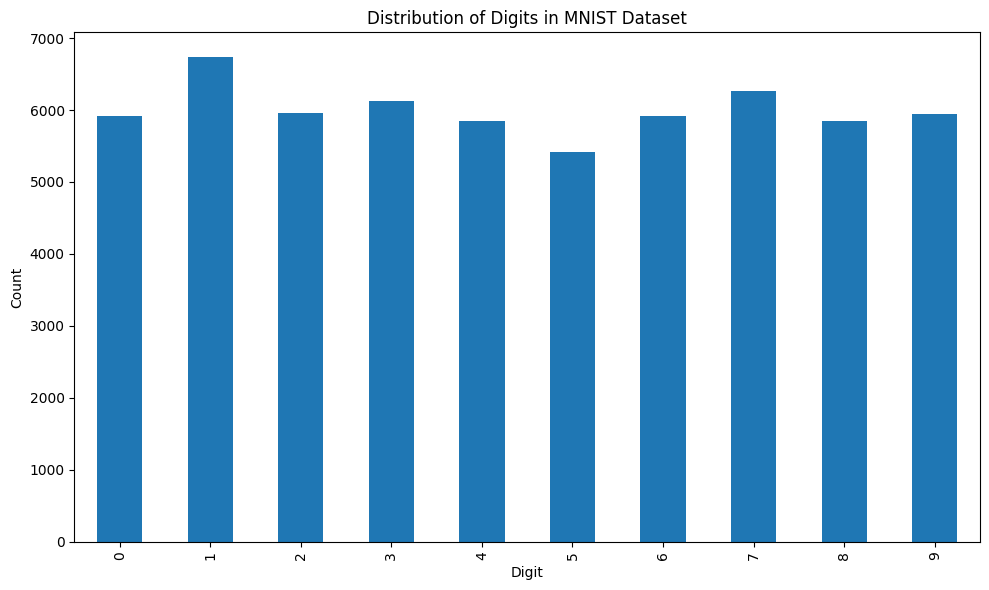

In [23]:
# Visualize label distribution
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Digits in MNIST Dataset')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [11]:
# Convert images to 2D numpy array
images = np.array(train_df['image'].tolist())
images_2d = images.reshape(images.shape[0], -1)


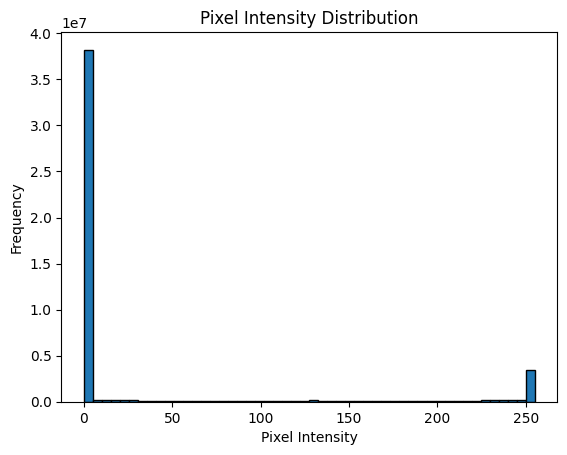

In [12]:
# Concatenate all flattened images into a single array
all_pixels = images_2d.flatten()

# Plot the histogram of pixel intensities
plt.hist(all_pixels, bins=50, edgecolor='black')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

d:\MLDL Projects\vproj\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\MLDL Projects\vproj\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


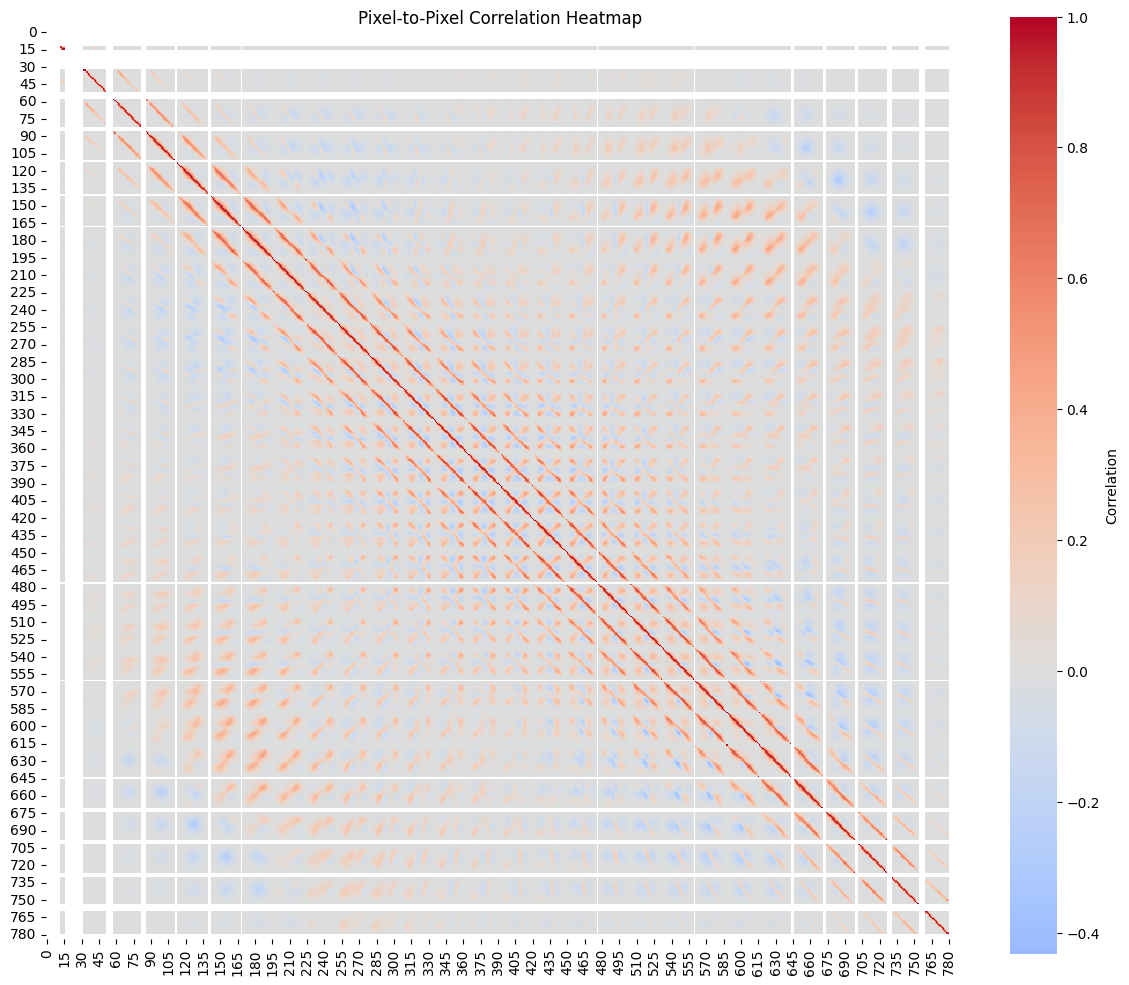

In [15]:
images = np.array(train_df['image'].tolist())
images_2d = images.reshape(images.shape[0], -1)

# Compute pixel correlations
pixel_correlations = np.corrcoef(images_2d.T)

plt.figure(figsize=(12, 10))
sns.heatmap(pixel_correlations, cmap='coolwarm', center=0, 
            square=True, cbar_kws={'label': 'Correlation'})
plt.title('Pixel-to-Pixel Correlation Heatmap')
plt.tight_layout()
plt.show()

### Data Preprocessing for model building

### PCA Analysis

In [16]:
# Convert images to 2D numpy array
images = np.array(train_df['image'].tolist())
images_2d = images.reshape(images.shape[0], -1)
labels = train_df['label']

In [17]:
# Standardize the data
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images_2d)

# PCA
pca = PCA()
pca_result = pca.fit_transform(images_scaled)

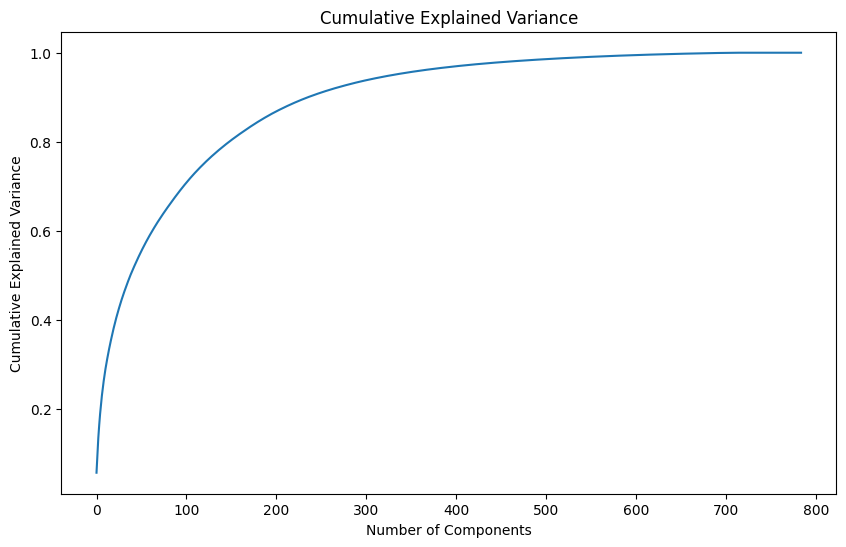

In [ ]:
# Explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

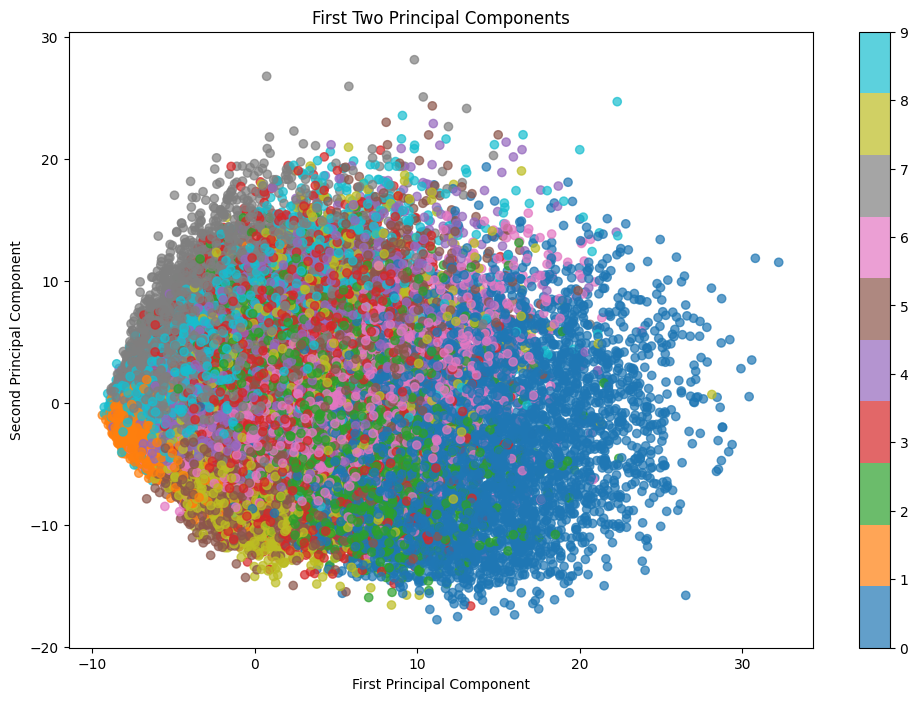

In [19]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], 
                        c=labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter)
plt.title('First Two Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

KeyError: 'Standard Scaling'

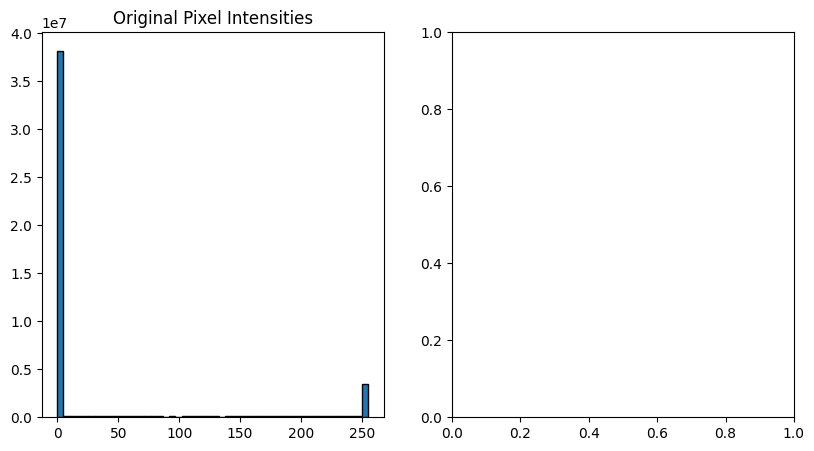

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Convert images to float32 to reduce memory usage
images = np.array(train_df['image'].tolist(), dtype=np.float32)
images_2d = images.reshape(images.shape[0], -1)

# Initialize StandardScaler
scaler = StandardScaler()
batch_size = 1000

# Fit scaler in batches
for i in range(0, images_2d.shape[0], batch_size):
    batch_images = images_2d[i:i + batch_size]
    scaler.partial_fit(batch_images)

scaled_images = scaler.transform(images_2d)

# Visualize effects of preprocessing
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(131)
plt.hist(images_2d.flatten(), bins=50, edgecolor='black')
plt.title('Original Pixel Intensities')

# Standard Scaled
plt.subplot(132)
plt.hist(preprocessed_images['Standard Scaling'].flatten(), bins=50, edgecolor='black')
plt.title('Standard Scaled Pixel Intensities')

# Min-Max Scaled
plt.subplot(133)
plt.hist(preprocessed_images['Min-Max Scaling'].flatten(), bins=50, edgecolor='black')
plt.title('Min-Max Scaled Pixel Intensities')

plt.tight_layout()
plt.show()

## Model Training and Testing

### K-Nearest Neighbours

In [ ]:
def train_and_evaluate_knn(X_train, X_test, y_train, y_test, n_neighbors=5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("KNN Classification Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    
    return knn, accuracy

### Logistic Regression

In [ ]:
def train_and_evaluate_logistic_regression(X_train, X_test, y_train, y_test, max_iter=1000):
    lr = LogisticRegression(multi_class='multinomial', max_iter=max_iter)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Logistic Regression Classification Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    
    return lr, accuracy

### Support Vector Machines

In [ ]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf'):

    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print("Support Vector Machine Classification Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    
    return svm, accuracy

## Evaluation & Results

In [26]:
# Extract features and labels
X_train = np.array(train_df['image'].tolist())
y_train = train_df['label'].values

X_test = np.array(test_df['image'].tolist())
y_test = test_df['label'].values

# Reshape images for ML models (flatten)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
knn_model, knn_accuracy = train_and_evaluate_knn(X_train_scaled, X_test_scaled, y_train, y_test)
    
    

d:\MLDL Projects\vproj\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\MLDL Projects\vproj\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                 

KNN Classification Results:
Accuracy: 0.9443
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.99      0.97      1135
           2       0.96      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.93      0.92      0.93       892
           6       0.96      0.97      0.97       958
           7       0.94      0.92      0.93      1028
           8       0.96      0.90      0.93       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [28]:
lr_model, lr_accuracy = train_and_evaluate_logistic_regression(X_train_scaled, X_test_scaled, y_train, y_test)
   

d:\MLDL Projects\vproj\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Classification Results:
Accuracy: 0.9216
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.88      0.87       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [29]:
svm_model, svm_accuracy = train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test)

Support Vector Machine Classification Results:
Accuracy: 0.9660
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.96      0.96      0.96       892
           6       0.98      0.97      0.98       958
           7       0.93      0.96      0.94      1028
           8       0.96      0.95      0.96       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [30]:
def visualize_predictions(X_test, y_test, model, model_name):
    """
    Visualize some predictions from the trained model
    
    Args:
    - X_test: Test features
    - y_test: Test labels
    - model: Trained model
    - model_name: Name of the model for title
    """
    # Select a subset of test images
    num_samples = 25
    sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
    
    # Create a figure
    plt.figure(figsize=(15, 10))
    
    for i, idx in enumerate(sample_indices):
        # Reshape image back to 28x28
        image = X_test[idx].reshape(28, 28)
        true_label = y_test[idx]
        pred_label = model.predict(X_test[idx].reshape(1, -1))[0]
        
        plt.subplot(5, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {true_label}, Pred: {pred_label}", fontsize=8)
        plt.axis('off')
    
    plt.suptitle(f"{model_name} Predictions", fontsize=16)
    plt.tight_layout()
    plt.show()

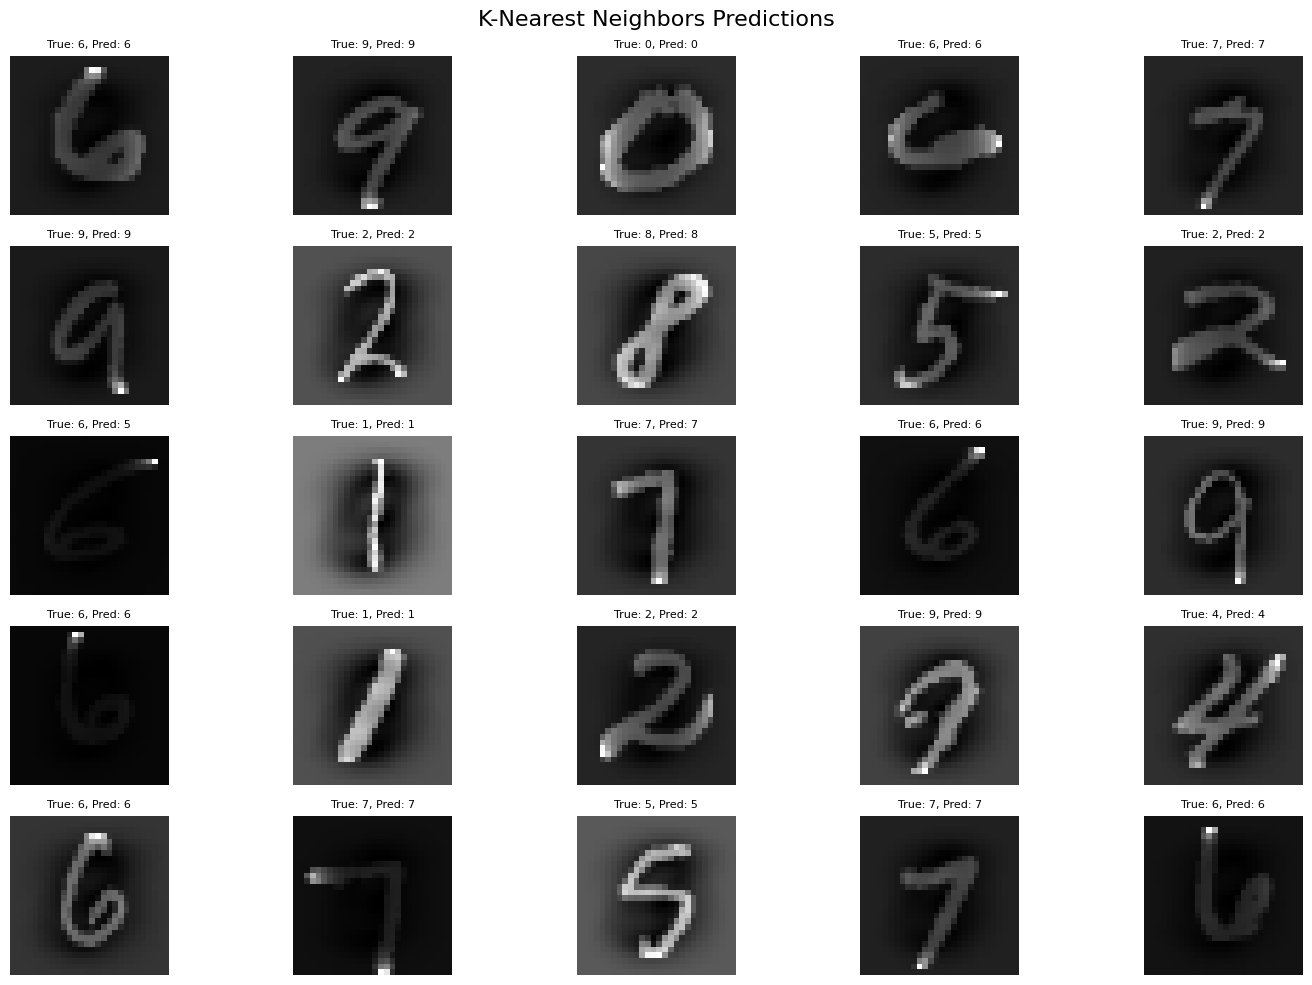

In [31]:
# Visualize Predictions
visualize_predictions(X_test_scaled, y_test, knn_model, "K-Nearest Neighbors")


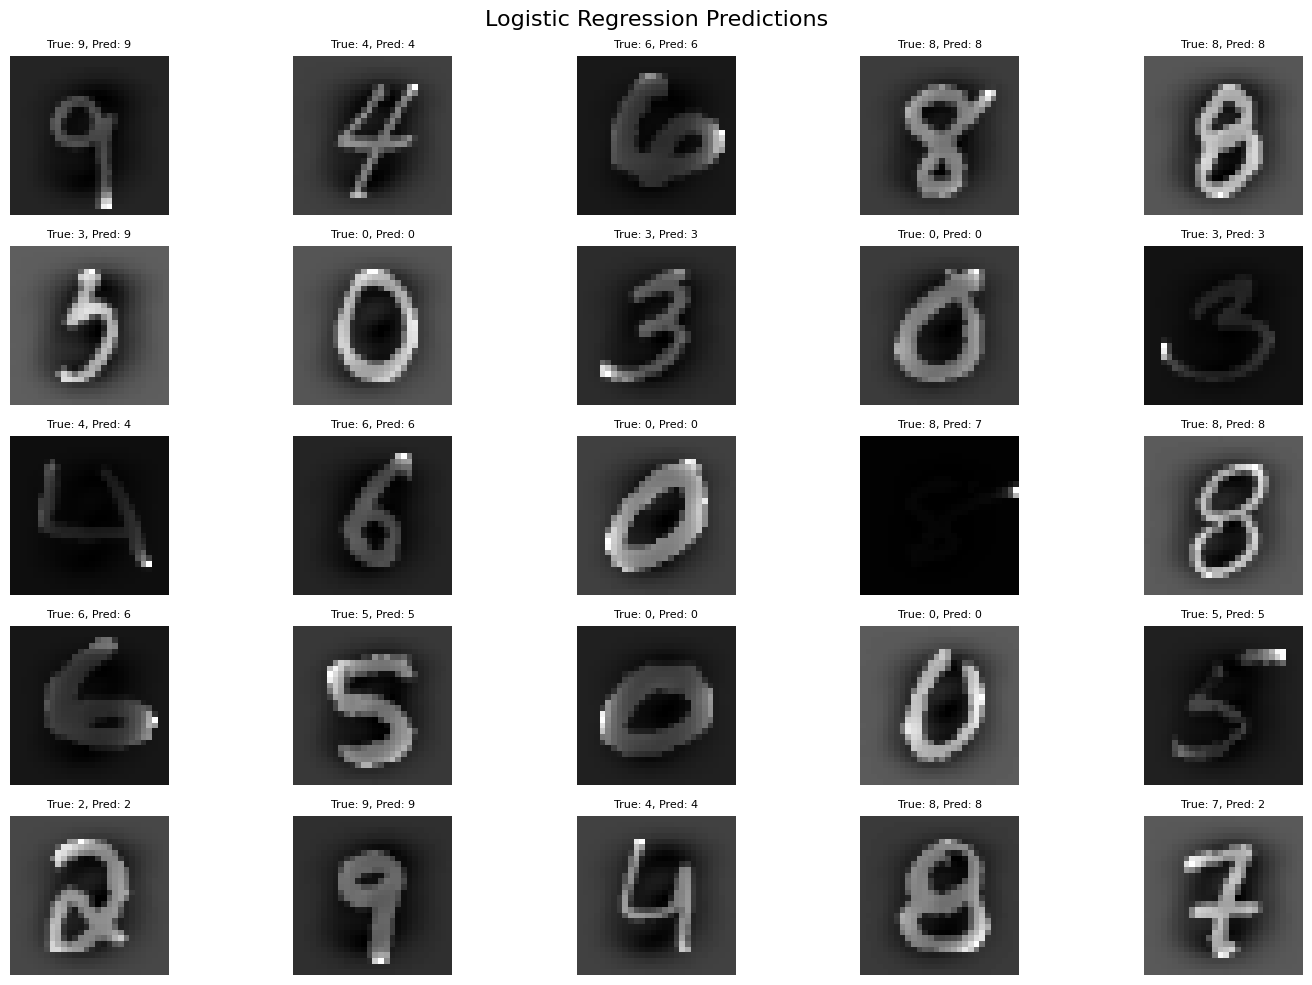

In [32]:
visualize_predictions(X_test_scaled, y_test, lr_model, "Logistic Regression")


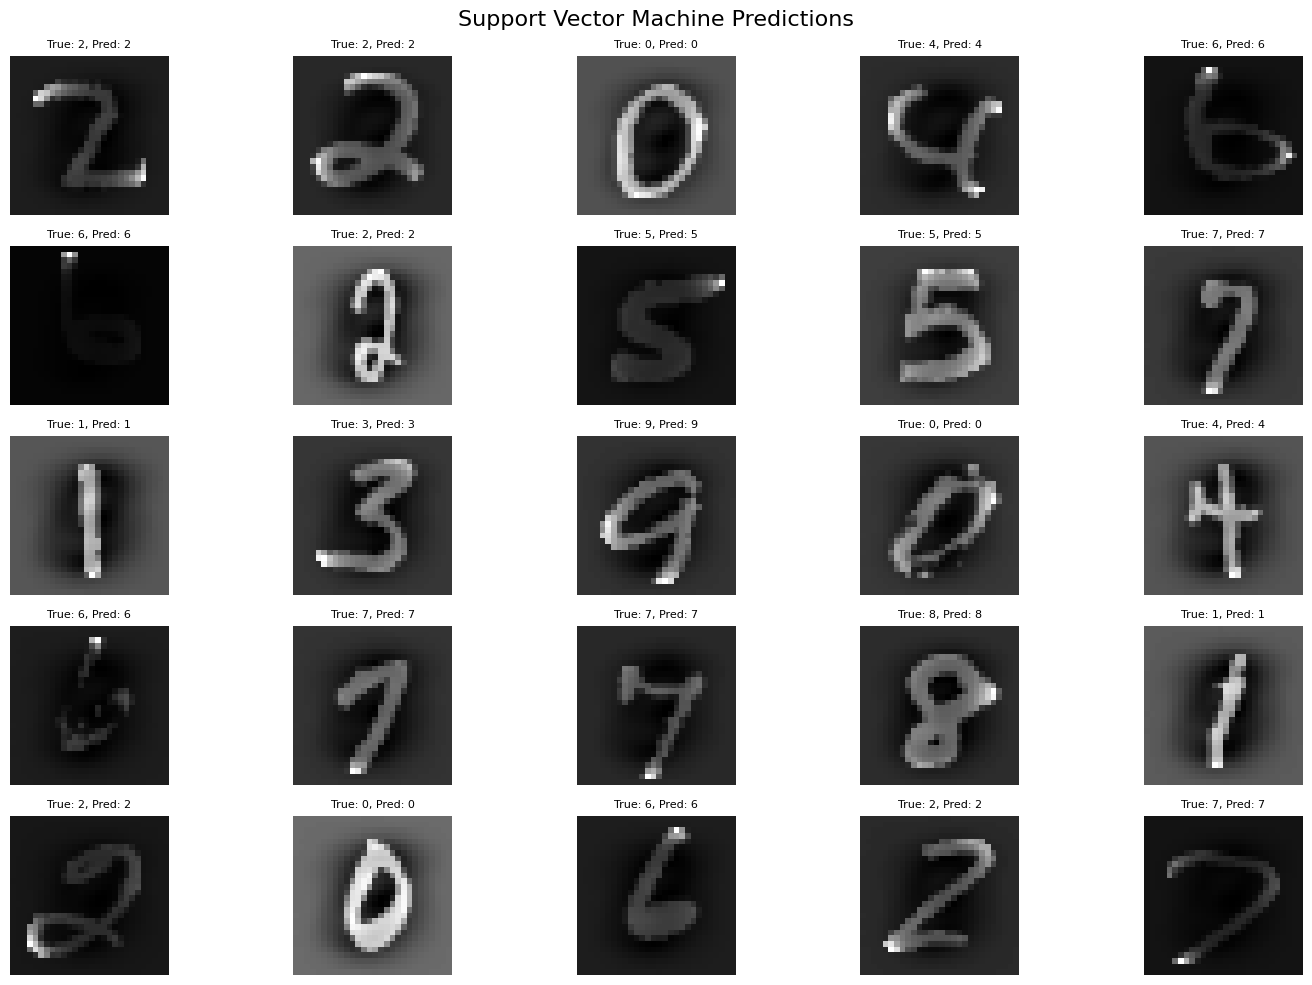

In [33]:
visualize_predictions(X_test_scaled, y_test, svm_model, "Support Vector Machine")